# Lab 2 write-up -- Aureliano Liu

In [62]:
%matplotlib inline 
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from time import time

# Question 1 A

I choose X = 1 as the parameter for the poisson distribution\
The Poisson pdf is below, and we can see the graph later with more days of convolution

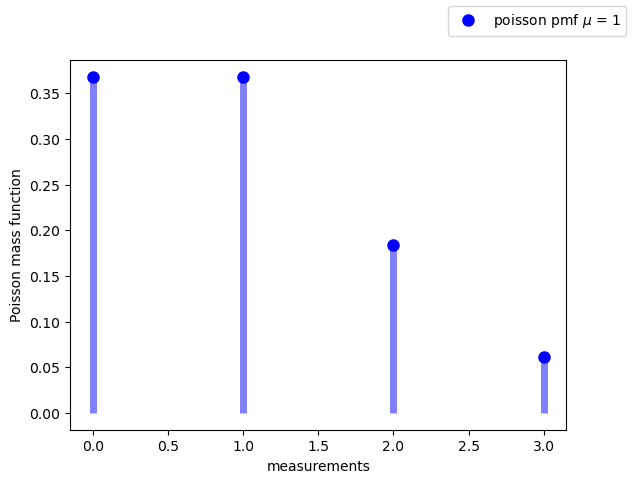

In [63]:
x = np.arange(stats.poisson.ppf(0.01, 1),stats.poisson.ppf(0.99, 1))
fig,ax = plt.subplots()
pdf = stats.poisson.pmf(x, 1)
ax.plot(x,pdf , 'bo', ms=8, label='poisson pmf $\mu$ = 1')
ax.vlines(x, 0, stats.poisson.pmf(x, 1), colors='b', lw=5, alpha=0.5)
ax.set_xlabel("measurements")
ax.set_ylabel("Poisson mass function")
fig.legend()

Define the Convolv function takes "count" times convolution of probability density function 

In [64]:
def convolv(A,old,count):
    if(count == 1):
        return old
    else:
        temp = np.convolve(A,old)
        return convolv(A,temp,count-1)

# Question 1 B

We can refer to the graph below where we convolve 5 days of Poisson distribution

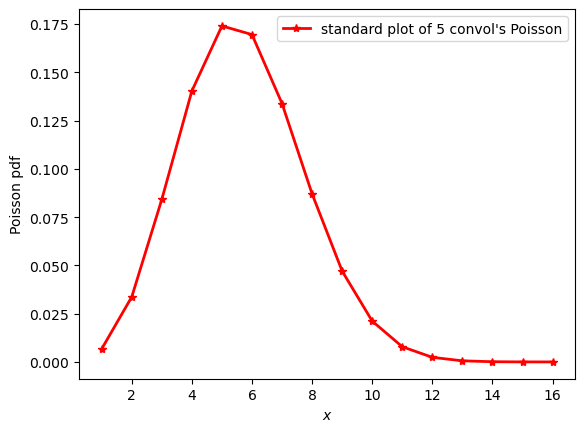

In [65]:
new_pdf = convolv(pdf,pdf,5) # We convolve Poisson's pdf 5 times 
length = len(new_pdf)
fig2,ax2 = plt.subplots()
y = np.linspace(1,16,16)
ax2.plot(y,new_pdf,'r*-',lw="2",label="standard plot of 5 convol's Poisson")
ax2.set_xlabel("$x$")
ax2.set_ylabel("Poisson pdf")
ax2.legend()

We can see from the plot below that the distribution still looks like Poisson, \
we can change the y scale to log function

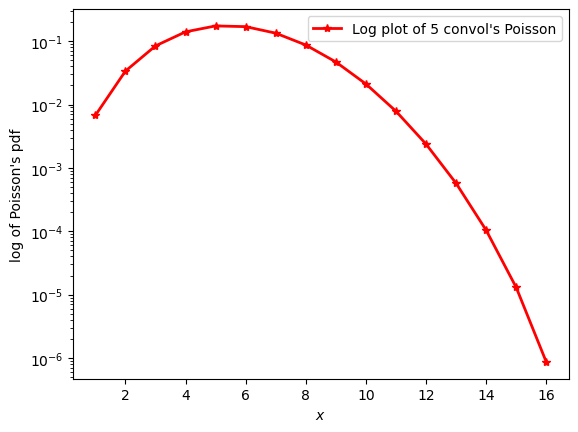

In [66]:
fig10,ax10 = plt.subplots()
plt.yscale("log")
ax10.plot(y,new_pdf,'r*-',lw="2",label="Log plot of 5 convol's Poisson")
ax10.set_xlabel("$x$")
ax10.set_ylabel("log of Poisson's pdf")            
ax10.legend()

# Question 1 C

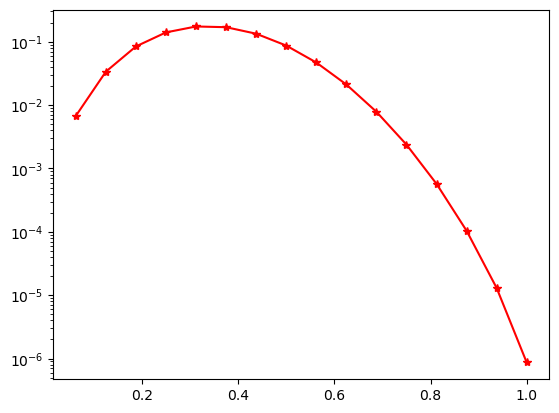

In [67]:
y = np.linspace(1,16,16)
fig3,ax3 = plt.subplots()
plt.yscale("log")
ax3.plot(y/len(y),new_pdf,'r*-',label="Averaged log plot of Poisson")

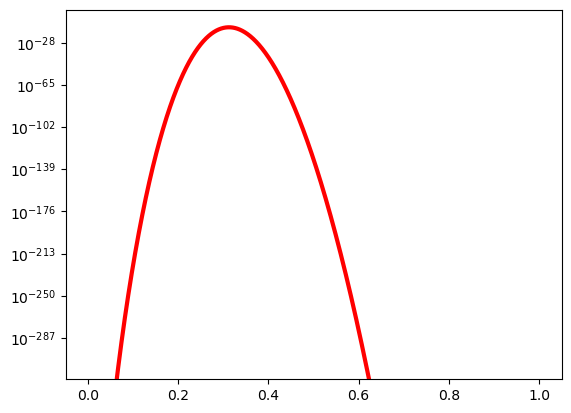

In [68]:
new_pdf2 = convolv(pdf,pdf,1500) # convolve 1500 times
length = len(new_pdf2)
fig3,ax3 = plt.subplots()
plt.yscale("log")
y = np.linspace(1,length,length)
ax3.plot(y/len(y),new_pdf2,'r',lw="3",label="Averaged log plot after 1500 convolutions")

We can find that as we convolve 1500 days, we can find the pdf becoming more like Gaussian,\
just like what we were expecting from the central limit theorem

# Question 1 D

In [69]:

# pick Y = 4 >> 1, and N = 50
Y = 4
N = 50
new_pdf = convolv(pdf,pdf,N)
res = np.cumsum(new_pdf)
# I would expect the Y*N is the last element in this array since the max result is Y*N = 200
prob = res[-1]
sigma = stats.norm.ppf(1-prob)
sigma

0.2964235162523031

From the result above, we can see that the value of sigma is way below our significant bar -- 5 sigma

# Question 2 A

In [70]:
# 2 A 
x = np.linspace(stats.rayleigh.ppf(0.01),stats.rayleigh.ppf(0.99), 100)
pdf = stats.rayleigh.pdf(x)

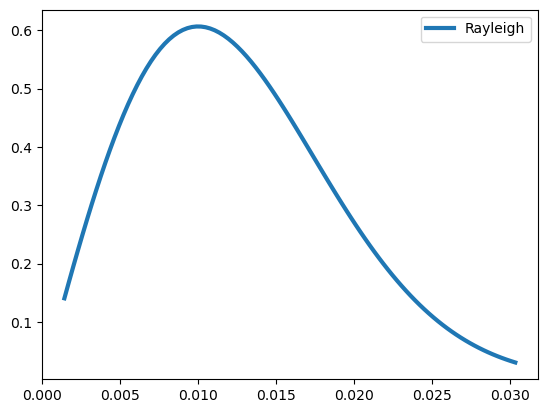

In [71]:
fig5,ax5 = plt.subplots()
ax5.plot(x/len(x),pdf,lw = "3",label="Rayleigh")
ax5.legend()

# Question 2 B

In [72]:
new_pdf = convolv(pdf,pdf,3)
x1 = np.linspace(3,3*len(x),len(x)+2*(len(x)-1))

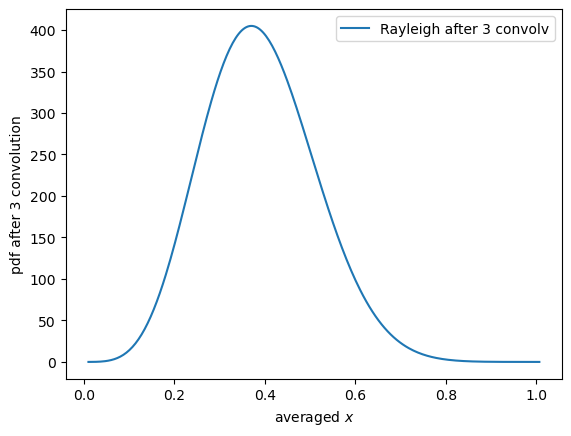

In [73]:
fig,ax = plt.subplots()
#plt.yscale("log")
ax.plot(x1/len(x1),new_pdf,label="Rayleigh after 3 convolv")
ax.set_xlabel("averaged $x$")
ax.set_ylabel("pdf after 3 convolution")
ax.legend()

In [74]:
new_pdf1 = convolv(pdf,pdf,8)
x2 = np.linspace(8,8*len(x),len(x)+7*(len(x)-1))

Text(0, 0.5, 'pdf after 8 convolution')

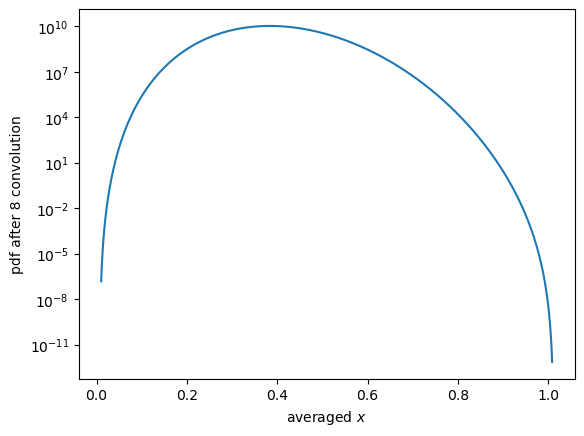

In [75]:
fig2,ax2 = plt.subplots()
plt.yscale("log")
ax2.plot(x2/len(x2),new_pdf1,label="Rayleigh after 8 convolv")
ax2.set_xlabel("averaged $x$")
ax2.set_ylabel("pdf after 8 convolution")

In [76]:
new_pdf2 = convolv(pdf,pdf,100)
x2 = np.linspace(0,len(new_pdf2),len(new_pdf2))

Text(0, 0.5, 'pdf after 100 convolution')

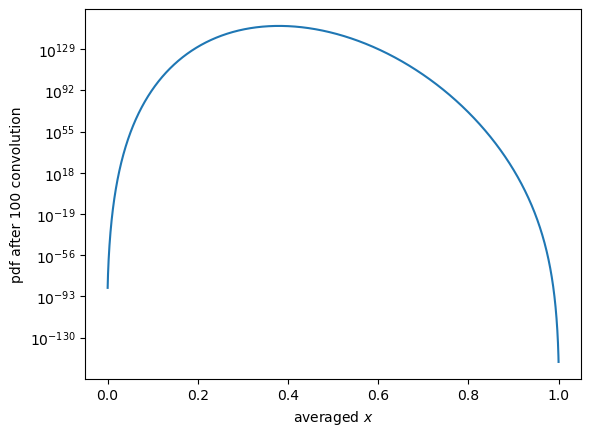

In [77]:
fig,ax = plt.subplots()
plt.yscale("log")
ax.plot(x2/len(x2),new_pdf2,label="Rayleigh after 100 convolution")
ax.set_xlabel("averaged $x$")
ax.set_ylabel("pdf after 100 convolution")

It's approaching towards Gaussian distribution as shown from the graph above: The log plot becomes parabola shape like Gaussian\
The pattern is quite obvious after 100 convolutions of Rayleigh distribution

# Question 3

In [78]:
x = np.linspace(stats.norm.ppf(0.01),stats.norm.ppf(0.99),1000)

In [79]:
pdf = stats.norm.pdf(x)

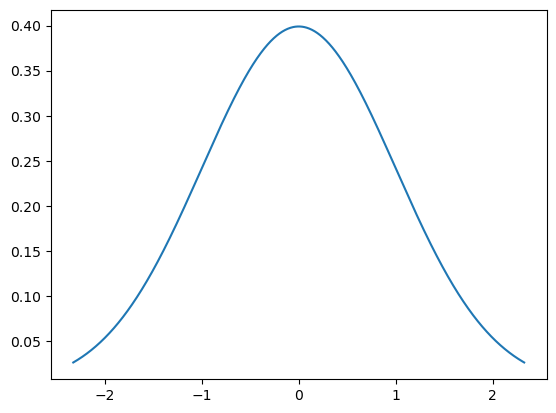

In [80]:
fig,ax = plt.subplots()
ax.plot(x,pdf)

# Version 1 part A


Assuming we read 5.5 as Y
Let's assume the Gaussian distribution has standard deviation of 1 and mean of 0. \
So the sigma in this distribution is (Y- $\mu$) = sigma where $\mu$ = 0 in this case \
So the question is : If there is no signal, what is the probability of reading Y or more than Y due to the background noise?\
Thus sigma = 5.5 > 5 \
Thus the reading of 5.5 is significant 

# Version 2 part B


The statistical question we can ask is :  \
What's the probability to find the signal-like or more than that from the background noise from all of 10k pixels? \
To solve the problem, we need to first find out the new pdf after multiplying Gaussian's pdf 10k times 

In [81]:
x = np.linspace(stats.norm.ppf(0.01),stats.norm.ppf(0.99),1000)
pdf = stats.norm.pdf(x)
pixel = 10000

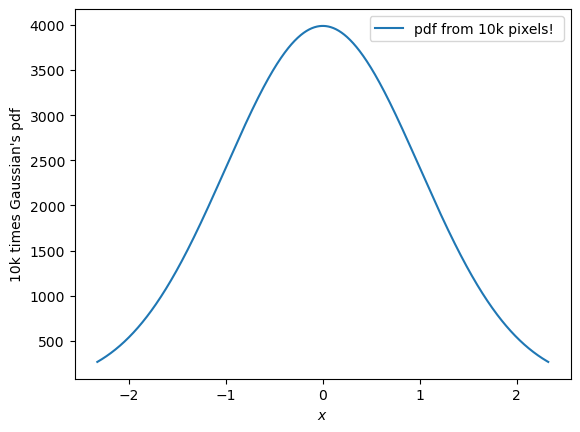

In [82]:
fig,ax = plt.subplots()
ax.plot(x,pdf*pixel,label="pdf from 10k pixels! ")
ax.set_xlabel("$x$")
ax.set_ylabel("10k times Gaussian's pdf")
plt.legend()

# Version 2 part C

After having the new probability density function of 10k pixels, we want to find what is the value of sigma if we have a \
reading of 5.5 from part A? \
The math we need to do is same as our Lab 1 probelm: 

Integral :  $$1 - \int_{5.5}^{\infty} pdf(x) dx $$

With the value of probability, we can then use norm.ppf() to convert the value back to the corresponding sigma:

In [83]:
sigma = stats.norm.ppf((1 - stats.norm.cdf(5.5))* pixel)
sigma

-3.553742240574179

The value of sigma is negative since the result is on the left side of the mean after translating back to Gaussian

# Question 4A


for version 1, recall that we have a normal distribution with mean = 0 and std deviation = 1\
The minimum signal required for a 5-sigma detection is 5

# Question 4B 

for version 2, since our pdf has changed after multiplying pdf 10k times, we need to ask : \
With the new probability density function, what is the probability of some seemingly significant readings are actually from 
the background noise? \
So we can write the new integral as follows: \
and we want to find the values of ??? in this case such that norm.ppf() of the follow result can yield more than 5 sigma's 
significance

Integral :  $$1 - \int_{???}^{\infty} new\ pdf(x) dx $$

In [84]:
#code: 
sigma5 = 1/3.5e6
det = stats.norm.ppf(1- sigma5/pixel)
det

6.551026394051586

Thus, we can find that to have a 5 sigma significance detection, we need at least 6.55 of detection

# Question 4 C


So before the trial factors of 10k, the minimum reading theshold is 5; \
After the trial factors, we need at least 6.55, so we need :

In [85]:
(det - 5)*100 / 5

31.02052788103173

which is around 31% brighter signal than no-trial factoring case \
The sensitivity penalty due to trial factor is so low since we are measureing data with Gaussian distribution which has very small probability to have edge cases.

# Question 4 D

if we change the trial factos significantly, say we change from 10k to 1000k, our threshold became to be :

In [86]:
pixel = 1000000
stats.norm.ppf(1- sigma5/pixel)

7.207157100988285

we need at least around 7.21 signal \
To have a better visualization of the change, we can use matplotlib to demo

In [87]:
index = 0
pixels = np.logspace(1,10,num = 10, base = 10)
res = np.ones(10)
while(index < len(pixels)) :
    pixel = pixels[index]
    res[index] = stats.norm.ppf(1- sigma5/pixel)
    index+=1

Text(0, 0.5, 'threshold')

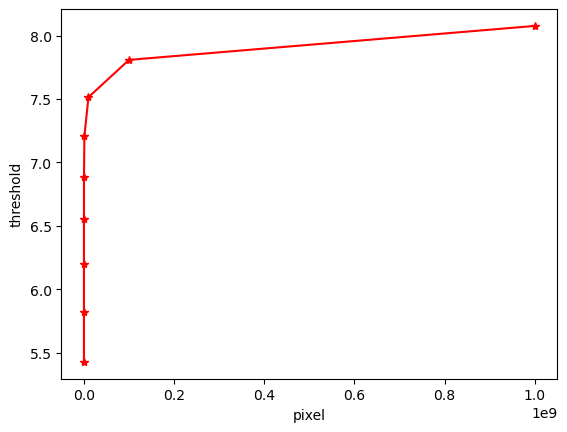

In [88]:
fig,ax = plt.subplots()
ax.plot(pixels,res,'r*-',label="Gaussian trial factoring")
ax.set_xlabel("pixel")
ax.set_ylabel("threshold")

From the plot above, we can find that as we increase trial factos by multiplying 10 each time,
our threshold increase as well, \
but the pattern is concaved down as shown above

# Extra credit


We investigate more on the effect of Poisson distribution's trial factor with $\mu$ = 1

In [89]:
index = 0
pixels = np.logspace(1,10,num = 10, base = 10)
res2 = np.ones(10)
while(index < len(pixels)) :
    pixel = pixels[index]
    res2[index] = stats.poisson.ppf(1- sigma5/pixel,1)
    index+=1

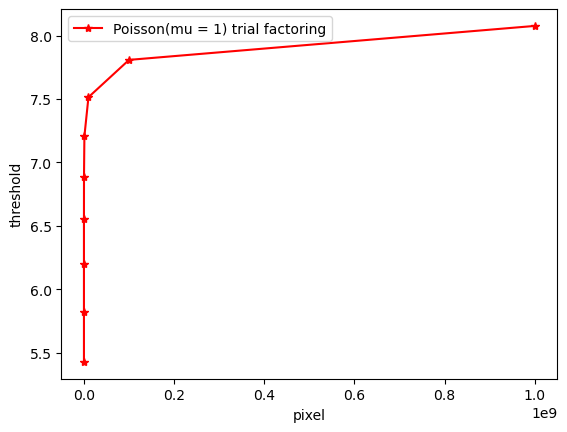

In [90]:
fig2,ax2 = plt.subplots()
ax2.plot(pixels,res,'r*-',label="Poisson(mu = 1) trial factoring")
ax2.set_xlabel("pixel")
ax2.set_ylabel("threshold")
ax2.legend()

# END OF LAB 2